# **Informe comparativo sobre algoritmos en Java y Python**

In [112]:
# Importacion de modulos requeridos

# Manejo de datos en CSV
import pandas as pd

# Graficas
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv           



In [113]:
# Leer el CSV
df_python_results = pd.read_csv('../NPC_SUB_DIGRAFH_PYTHON_CODE/results.csv', sep=';', encoding='utf-8')
df_java_results = pd.read_csv('../NPC_SUB_DIGRAFH_JAVA_CODE/results.csv', sep=';', encoding='utf-8')

## **Verificación de que los datos fueron cargados correctamente**

In [114]:
# Ver las primeras filas
print(df_python_results.head(10))

print('-----------------------------------')
print('Datos Java')
print(df_java_results.head(2))

   seed vertices                                            aristas   n  k  \
0   777  [1...4]                           [(1, 4), (2, 4), (3, 4)]   3  3   
1   778  [1...1]                                                 []   0  0   
2   779  [1...9]  [(1, 7), (2, 7), (2, 9), (2, 3), (3, 7), (3, 4...  11  6   
3   780  [1...4]           [(1, 3), (1, 2), (2, 3), (2, 4), (3, 4)]   5  2   
4   781  [1...4]                                           [(1, 3)]   1  1   
5   782  [1...2]                                           [(1, 2)]   1  1   
6   783  [1...9]  [(1, 8), (1, 5), (2, 7), (3, 6), (3, 7), (3, 8...  13  3   
7   784  [1...7]  [(1, 7), (1, 4), (1, 2), (1, 5), (1, 3), (1, 6...  19  1   
8   785  [1...9]   [(1, 3), (2, 4), (2, 3), (4, 9), (4, 8), (5, 7)]   6  1   
9   786  [1...6]                                           [(3, 5)]   1  1   

  tiempo BF  ops BF tiempo DC  ops DC  tiempo BT  ops BT  
0  0.003582       9  0.003284      29   0.003037      21  
1  0.000055       3  0.

In [115]:
df_python_results.info()
df_java_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seed       20 non-null     int64  
 1   vertices   20 non-null     object 
 2   aristas    20 non-null     object 
 3   n          20 non-null     int64  
 4   k          20 non-null     int64  
 5   tiempo BF  20 non-null     object 
 6   ops BF     20 non-null     int64  
 7   tiempo DC  20 non-null     object 
 8   ops DC     20 non-null     int64  
 9   tiempo BT  20 non-null     float64
 10  ops BT     20 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seed       20 non-null     int64  
 1   vertices   20 non-null     object 
 2   aristas    20 non-null     object 
 3   n      

## **Gráficas comparativas para Python**

### **Gráfica numero de operaciones por algoritmo**

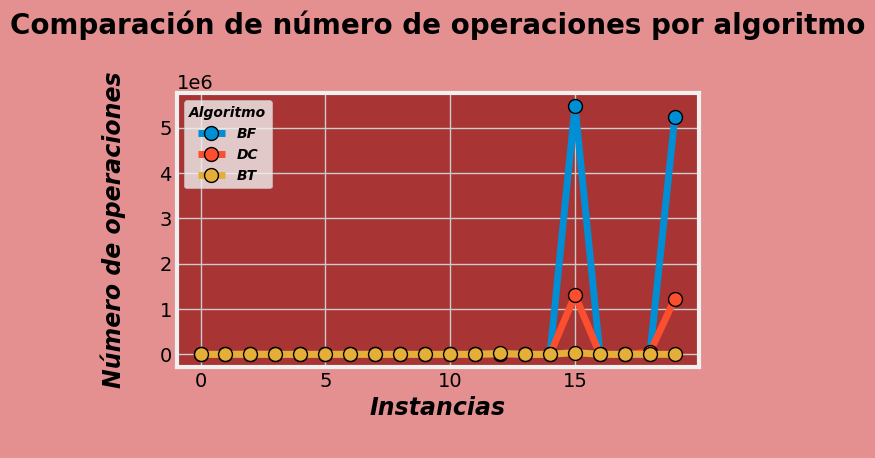

In [116]:
df = df_python_results.copy()           
ycols = ["ops BF", "ops BT"]            # columnas sin NaN


plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()

fig.patch.set_facecolor("#E49090")   # fondo exterior
ax.set_facecolor("#A83434")          # fondo del área de dibujo

# Preparamos el eje X (una posición por instancia)
x = np.arange(len(df))              # 0, 1, …, 9


# Dibujamos
ax.plot(x, df_python_results["ops BF"], marker="o", label="BF", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Brute-Force
ax.plot(x, df_python_results["ops DC"], marker="o", label="DC", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Divide & Conquer
ax.plot(x, df_python_results["ops BT"], marker="o", label="BT", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Backtracking


# — Marcador para cada TIMEOUT —
mask_to = df["ops DC"].isna()
if mask_to.any():
    # 3a) Obtén los límites tras trazar las curvas
    ymin, ymax = ax.get_ylim()
    
    # 3b) Coloca la marca un 5 % por encima del límite superior actual
    y_to = ymax + 0.05*(ymax - ymin)
    
    ax.scatter(x[mask_to], np.full(mask_to.sum(), y_to),
               marker="X", s=250,              # grande
               facecolor="white", edgecolor="black", linewidth=2,
               label="DC TIMEOUT")
    
    # 3c) Amplía el eje Y para que la marca quede dentro de la vista
    ax.set_ylim(top=y_to + 0.05*(ymax - ymin))      # deja espacio para las X
    

# Etiquetas, título y leyenda
ax.set_xlabel("Instancias\n", fontsize=17, fontstyle='italic', fontweight = 'bold')
ax.set_ylabel("Número de operaciones\n", fontsize=17, fontstyle='italic', fontweight = 'bold')
ax.set_title("Comparación de número de operaciones por algoritmo\n", fontsize=20, fontweight='bold')
legend = ax.legend(title="Algoritmo", prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
                                     title_fontsize=10)
# Aplicar estilo al título manualmente
legend.get_title().set_fontstyle('italic')
legend.get_title().set_fontweight('bold')


# Si prefieres usar el número de *seed* en el eje X:
#ax.set_xticks(x)
#ax.set_xticklabels(df_python_results["seed"])

plt.tight_layout()
plt.show()

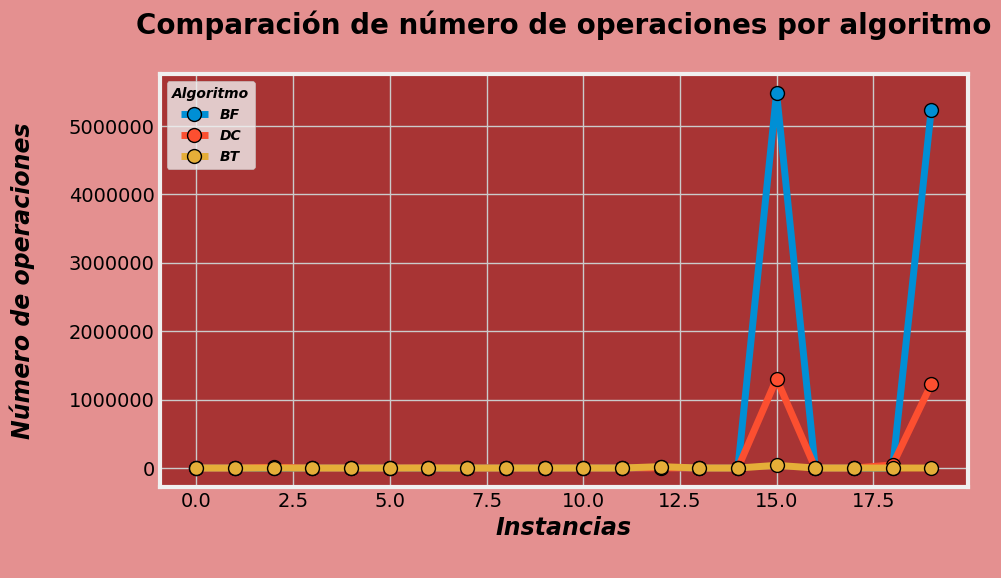

In [117]:
# 0️⃣ Copiar resultados de Python
df = df_python_results.copy()

# 1️⃣ Forzar "TIMEOUT" → NaN
for col in ["ops BF", "ops DC", "ops BT"]:
    df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce")

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

# 2️⃣ Eje X
x = np.arange(len(df))

# 3️⃣ Dibujar curvas
ax.plot(
    x, df["ops BF"], marker="o", label="BF",
    linewidth=5, markersize=10, markeredgecolor="black"
)
ax.plot(
    x, df["ops DC"], marker="o", label="DC",
    linewidth=5, markersize=10, markeredgecolor="black"
)
ax.plot(
    x, df["ops BT"], marker="o", label="BT",
    linewidth=5, markersize=10, markeredgecolor="black"
)

# 4️⃣ Timeout marker
mask_to = df["ops DC"].isna()
if mask_to.any():
    ymin, ymax = ax.get_ylim()
    y_to = ymax + 0.05 * (ymax - ymin)
    ax.scatter(
        x[mask_to], np.full(mask_to.sum(), y_to),
        marker="X", s=250,
        facecolor="white", edgecolor="black", linewidth=2,
        label="DC TIMEOUT"
    )
    ax.set_ylim(top=y_to + 0.05 * (ymax - ymin))

# 5️⃣ Desactivar notación científica en el eje Y
ax.ticklabel_format(style='plain', axis='y')

# 6️⃣ Etiquetas, título y leyenda
ax.set_xlabel("Instancias\n", fontsize=17, fontstyle='italic', fontweight='bold')
ax.set_ylabel("Número de operaciones\n", fontsize=17, fontstyle='italic', fontweight='bold')
ax.set_title("Comparación de número de operaciones por algoritmo\n", fontsize=20, fontweight='bold')
legend = ax.legend(
    title="Algoritmo",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=10
)
legend.get_title().set_fontstyle('italic')
legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.show()


#### **Número de operaciones (escala logaritmica)**

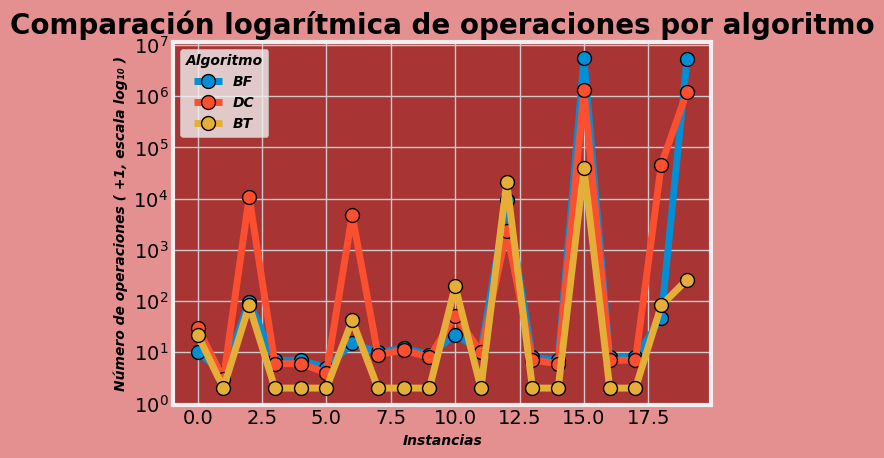

In [118]:
df = df_python_results.copy()

# TIMEOUT → NaN
df["ops DC"] = pd.to_numeric(df["ops DC"], errors="coerce")

# Para log(·), evitamos ceros sumando 1
for col in ["ops BF", "ops DC", "ops BT"]:
    df[col] = df[col] + 1            # 0 → 1   (no altera la escala relativa)

x = np.arange(len(df))               # 0..n-1

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

# ──────────────── 2)  Curvas ────────────────
ax.plot(x, df["ops BF"], marker="o", label="BF",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["ops DC"], marker="o", label="DC",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["ops BT"], marker="o", label="BT",
        linewidth=5, markersize=10, markeredgecolor="black")

# Escala logarítmica en Y
ax.set_yscale("log")

# ──────────────── 3)  Marcador TIMEOUT ────────────────
mask_to = df["ops DC"].isna()
if mask_to.any():
    ymin, ymax = ax.get_ylim()                 # ya en escala log
    y_to = ymax * 1.2                          # 20 % por encima

    ax.scatter(x[mask_to], np.full(mask_to.sum(), y_to),
               marker="X", s=250,
               facecolor="white", edgecolor="black", linewidth=2,
               label="DC TIMEOUT")

    ax.set_ylim(top=y_to * 1.05)               # deja hueco visible

# ──────────────── 4)  Texto y leyenda ────────────────
ax.set_xlabel("Instancias", fontsize=10, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Número de operaciones ( +1, escala log₁₀ )",
              fontsize=10, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación logarítmica de operaciones por algoritmo",
             fontsize=20, fontweight="bold")

legend = ax.legend(title="Algoritmo",
                   prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
                   title_fontsize=10)

legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()

### **Gráfica tiempo tomado por algoritmo**

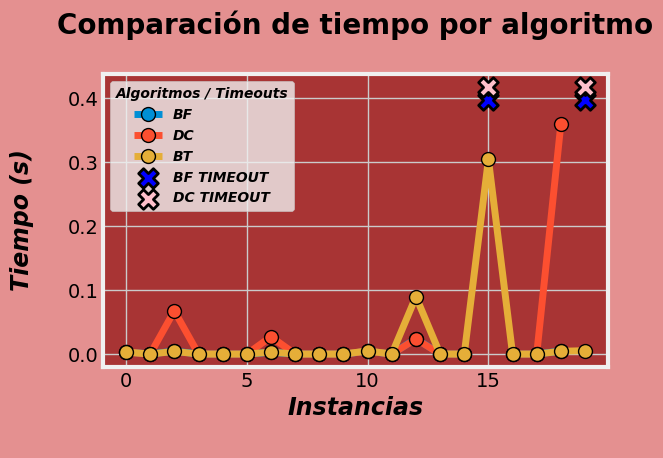

In [119]:
df = df_python_results.copy()

# 1️⃣ Forzar TIMEOUT → NaN en todas las columnas de tiempo
for col in ["tiempo BF", "tiempo DC", "tiempo BT"]:
    df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce")

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

x = np.arange(len(df))

# 2️⃣ Dibujar curvas
ax.plot(
    x, df["tiempo BF"], marker="o", label="BF",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)
ax.plot(
    x, df["tiempo DC"], marker="o", label="DC",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)
ax.plot(
    x, df["tiempo BT"], marker="o", label="BT",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)

# 3️⃣ Marcar TIMEOUT para cada algoritmo con "X" coloreada
timeout_colors = {
    "tiempo BF": "blue",
    "tiempo DC": "pink",
    "tiempo BT": "purple"
}

ymin, ymax = ax.get_ylim()
offset = 0.05 * (ymax - ymin)

for col, label in [
    ("tiempo BF", "BF TIMEOUT"),
    ("tiempo DC", "DC TIMEOUT"),
    ("tiempo BT", "BT TIMEOUT"),
]:
    mask = df[col].isna()
    if mask.any():
        y_to = ymax + offset
        ax.scatter(
            x[mask],
            np.full(mask.sum(), y_to),
            marker="X", s=200,
            facecolor=timeout_colors[col],  # interior de la X con color específico
            edgecolor="black", linewidth=2,
            label=label
        )
        ymax = y_to
        ax.set_ylim(top=ymax + offset)

# 4️⃣ Rótulos y leyenda
ax.set_xlabel("Instancias\n", fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Tiempo (s)\n",      fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación de tiempo por algoritmo\n", fontsize=20, fontweight="bold")

legend = ax.legend(
    title="Algoritmos / Timeouts",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=10
)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()


#### **Tiempo tomado por el algoritmo (Escala algoritmica)**

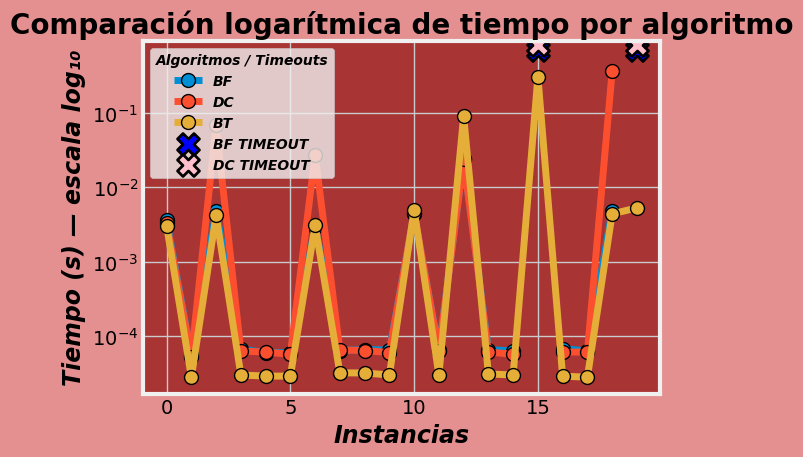

In [120]:
df = df_python_results.copy()

# 1️⃣ Forzar "TIMEOUT" → NaN y añadir epsilon para log
EPS = 1e-9
for col in ["tiempo BF", "tiempo DC", "tiempo BT"]:
    df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce") + EPS

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

x = np.arange(len(df))

# 2️⃣ Dibujar curvas (bolas con color original del estilo)
ax.plot(
    x, df["tiempo BF"], marker="o", label="BF",
    linewidth=5, markersize=10,
    markeredgecolor="black"  # sin especificar markerfacecolor, usa el default
)
ax.plot(
    x, df["tiempo DC"], marker="o", label="DC",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)
ax.plot(
    x, df["tiempo BT"], marker="o", label="BT",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)

# 3️⃣ Log scale en el eje Y
ax.set_yscale("log")

# 4️⃣ Marcar TIMEOUT con X coloreada según algoritmo
timeout_colors = {
    "tiempo BF": "blue",
    "tiempo DC": "pink",
    "tiempo BT": "purple"
}

ymin, ymax = ax.get_ylim()
offset = 0.2 * (ymax - ymin)  # subir las X un poco más

for col, label in [
    ("tiempo BF", "BF TIMEOUT"),
    ("tiempo DC", "DC TIMEOUT"),
    ("tiempo BT", "BT TIMEOUT"),
]:
    mask = df[col].isna()
    if mask.any():
        y_to = ymax + offset
        ax.scatter(
            x[mask], np.full(mask.sum(), y_to),
            marker="X", s=250,
            facecolor=timeout_colors[col],  # interior de la X
            edgecolor="black", linewidth=2,
            label=label
        )
        ymax = y_to
        ax.set_ylim(top=ymax + offset)

# 5️⃣ Etiquetas y leyenda
ax.set_xlabel("Instancias", fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Tiempo (s) — escala log₁₀", fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación logarítmica de tiempo por algoritmo", fontsize=20, fontweight="bold")

legend = ax.legend(
    title="Algoritmos / Timeouts",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=10
)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()

## **Gráficas comparativas de algoritmos en Java**

### **Gráfica número de operaciones por algoritmo**

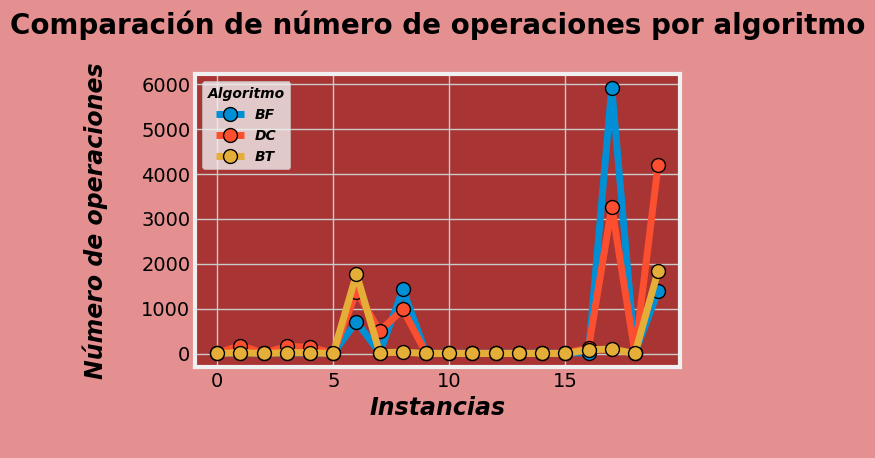

In [121]:
df = df_java_results.copy()           
ycols = ["ops BF", "ops BT"]            # columnas sin NaN


plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()

fig.patch.set_facecolor("#E49090")   # fondo exterior
ax.set_facecolor("#A83434")          # fondo del área de dibujo

# Preparamos el eje X (una posición por instancia)
x = np.arange(len(df))              # 0, 1, …, 9


# Dibujamos
ax.plot(x, df_java_results["ops BF"], marker="o", label="BF", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Brute-Force
ax.plot(x, df_java_results["ops DC"], marker="o", label="DC", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Divide & Conquer
ax.plot(x, df_java_results["ops BT"], marker="o", label="BT", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Backtracking


# — Marcador para cada TIMEOUT —
mask_to = df["ops DC"].isna()
if mask_to.any():
    # 3a) Obtén los límites tras trazar las curvas
    ymin, ymax = ax.get_ylim()
    
    # 3b) Coloca la marca un 5 % por encima del límite superior actual
    y_to = ymax + 0.05*(ymax - ymin)
    
    ax.scatter(x[mask_to], np.full(mask_to.sum(), y_to),
               marker="X", s=250,              # grande
               facecolor="white", edgecolor="black", linewidth=2,
               label="DC TIMEOUT")
    
    # 3c) Amplía el eje Y para que la marca quede dentro de la vista
    ax.set_ylim(top=y_to + 0.05*(ymax - ymin))      # deja espacio para las X
    

# Etiquetas, título y leyenda
ax.set_xlabel("Instancias\n", fontsize=17, fontstyle='italic', fontweight = 'bold')
ax.set_ylabel("Número de operaciones\n", fontsize=17, fontstyle='italic', fontweight = 'bold')
ax.set_title("Comparación de número de operaciones por algoritmo\n", fontsize=20, fontweight='bold')
legend = ax.legend(title="Algoritmo", prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
                                     title_fontsize=10)
# Aplicar estilo al título manualmente
legend.get_title().set_fontstyle('italic')
legend.get_title().set_fontweight('bold')


# Si prefieres usar el número de *seed* en el eje X:
#ax.set_xticks(x)
#ax.set_xticklabels(df_python_results["seed"])

plt.tight_layout()
plt.show()

#### **Número de operaciones (escala logaritmica)**

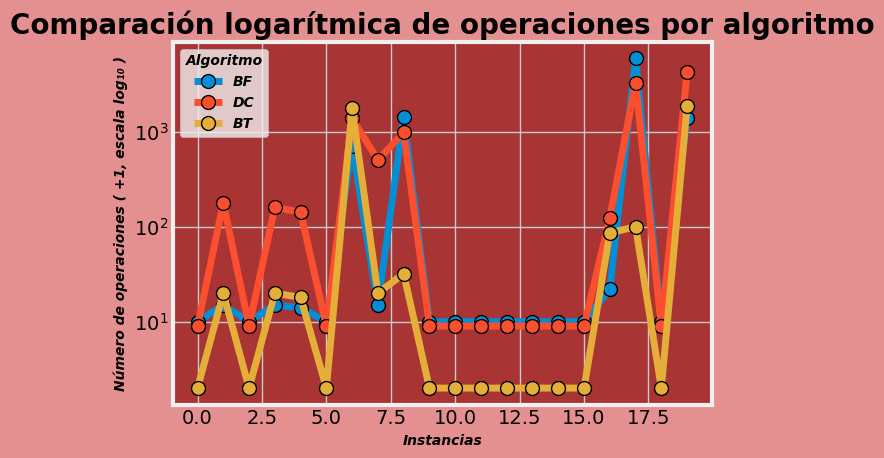

In [122]:
df = df_java_results.copy()

# TIMEOUT → NaN
df["ops DC"] = pd.to_numeric(df["ops DC"], errors="coerce")

# Para log(·), evitamos ceros sumando 1
for col in ["ops BF", "ops DC", "ops BT"]:
    df[col] = df[col] + 1            # 0 → 1   (no altera la escala relativa)

x = np.arange(len(df))               # 0..n-1

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

# ──────────────── 2)  Curvas ────────────────
ax.plot(x, df["ops BF"], marker="o", label="BF",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["ops DC"], marker="o", label="DC",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["ops BT"], marker="o", label="BT",
        linewidth=5, markersize=10, markeredgecolor="black")

# Escala logarítmica en Y
ax.set_yscale("log")

# ──────────────── 3)  Marcador TIMEOUT ────────────────
mask_to = df["ops DC"].isna()
if mask_to.any():
    ymin, ymax = ax.get_ylim()                 # ya en escala log
    y_to = ymax * 1.2                          # 20 % por encima

    ax.scatter(x[mask_to], np.full(mask_to.sum(), y_to),
               marker="X", s=250,
               facecolor="white", edgecolor="black", linewidth=2,
               label="DC TIMEOUT")

    ax.set_ylim(top=y_to * 1.05)               # deja hueco visible

# ──────────────── 4)  Texto y leyenda ────────────────
ax.set_xlabel("Instancias", fontsize=10, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Número de operaciones ( +1, escala log₁₀ )",
              fontsize=10, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación logarítmica de operaciones por algoritmo",
             fontsize=20, fontweight="bold")

legend = ax.legend(title="Algoritmo",
                   prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
                   title_fontsize=10)

legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()

### **Gráfica tiempo tomado por algoritmo**

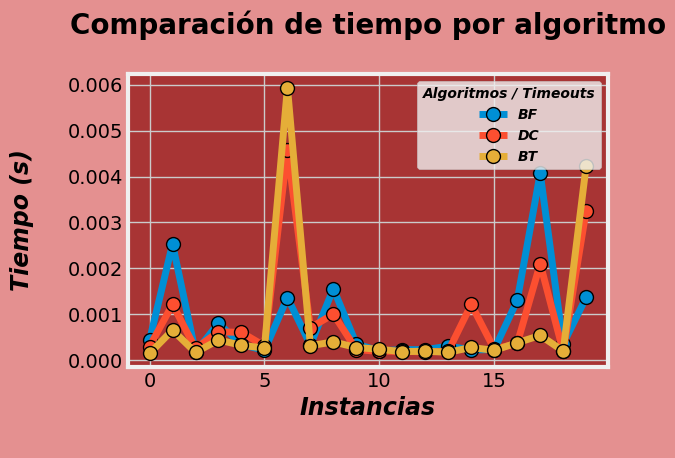

In [123]:
df = df_java_results.copy()

# 1️⃣ Forzar TIMEOUT → NaN en todas las columnas de tiempo
for col in ["tiempo BF", "tiempo DC", "tiempo BT"]:
    df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce")

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

x = np.arange(len(df))

# 2️⃣ Dibujar curvas
ax.plot(
    x, df["tiempo BF"], marker="o", label="BF",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)
ax.plot(
    x, df["tiempo DC"], marker="o", label="DC",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)
ax.plot(
    x, df["tiempo BT"], marker="o", label="BT",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)

# 3️⃣ Marcar TIMEOUT para cada algoritmo con "X" coloreada
timeout_colors = {
    "tiempo BF": "blue",
    "tiempo DC": "pink",
    "tiempo BT": "purple"
}

ymin, ymax = ax.get_ylim()
offset = 0.05 * (ymax - ymin)

for col, label in [
    ("tiempo BF", "BF TIMEOUT"),
    ("tiempo DC", "DC TIMEOUT"),
    ("tiempo BT", "BT TIMEOUT"),
]:
    mask = df[col].isna()
    if mask.any():
        y_to = ymax + offset
        ax.scatter(
            x[mask],
            np.full(mask.sum(), y_to),
            marker="X", s=200,
            facecolor=timeout_colors[col],  # interior de la X con color específico
            edgecolor="black", linewidth=2,
            label=label
        )
        ymax = y_to
        ax.set_ylim(top=ymax + offset)

# 4️⃣ Rótulos y leyenda
ax.set_xlabel("Instancias\n", fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Tiempo (s)\n",      fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación de tiempo por algoritmo\n", fontsize=20, fontweight="bold")

legend = ax.legend(
    title="Algoritmos / Timeouts",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=10
)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()


#### **Tiempo tomado por el algoritmo (Escala algoritmica)**

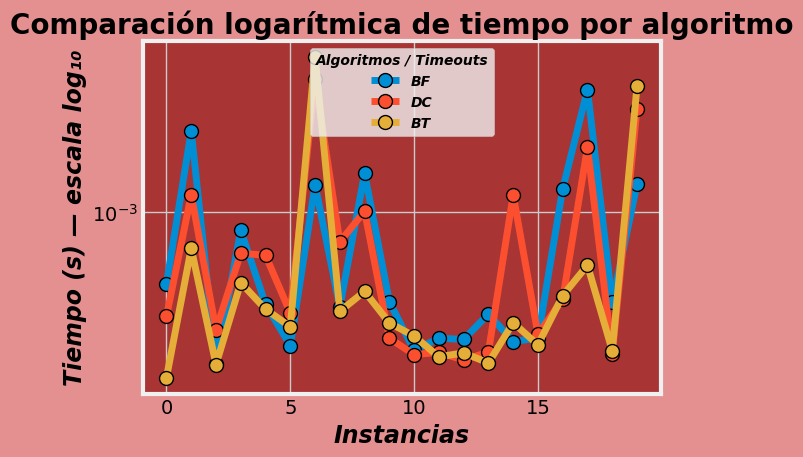

In [124]:
df = df_java_results.copy()

# 1️⃣ Forzar "TIMEOUT" → NaN y añadir epsilon para log
EPS = 1e-9
for col in ["tiempo BF", "tiempo DC", "tiempo BT"]:
    df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce") + EPS

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

x = np.arange(len(df))

# 2️⃣ Dibujar curvas (bolas con color original del estilo)
ax.plot(
    x, df["tiempo BF"], marker="o", label="BF",
    linewidth=5, markersize=10,
    markeredgecolor="black"  # sin especificar markerfacecolor, usa el default
)
ax.plot(
    x, df["tiempo DC"], marker="o", label="DC",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)
ax.plot(
    x, df["tiempo BT"], marker="o", label="BT",
    linewidth=5, markersize=10,
    markeredgecolor="black"
)

# 3️⃣ Log scale en el eje Y
ax.set_yscale("log")

# 4️⃣ Marcar TIMEOUT con X coloreada según algoritmo
timeout_colors = {
    "tiempo BF": "blue",
    "tiempo DC": "pink",
    "tiempo BT": "purple"
}

ymin, ymax = ax.get_ylim()
offset = 0.2 * (ymax - ymin)  # subir las X un poco más

for col, label in [
    ("tiempo BF", "BF TIMEOUT"),
    ("tiempo DC", "DC TIMEOUT"),
    ("tiempo BT", "BT TIMEOUT"),
]:
    mask = df[col].isna()
    if mask.any():
        y_to = ymax + offset
        ax.scatter(
            x[mask], np.full(mask.sum(), y_to),
            marker="X", s=250,
            facecolor=timeout_colors[col],  # interior de la X
            edgecolor="black", linewidth=2,
            label=label
        )
        ymax = y_to
        ax.set_ylim(top=ymax + offset)

# 5️⃣ Etiquetas y leyenda
ax.set_xlabel("Instancias", fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Tiempo (s) — escala log₁₀", fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación logarítmica de tiempo por algoritmo", fontsize=20, fontweight="bold")

legend = ax.legend(
    title="Algoritmos / Timeouts",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=10
)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()

## **Gráficas comparativas de Python vs Java**

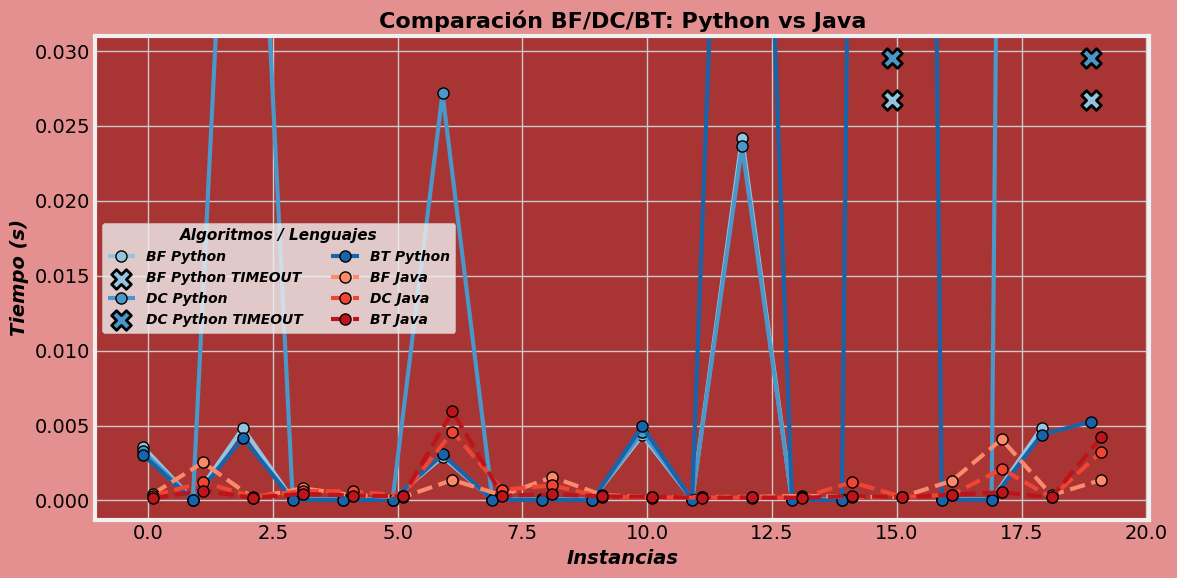

In [125]:
# 0️⃣ Copiar ambos resultados
dfs = {
    'Python': df_python_results.copy(),
    'Java':   df_java_results.copy()
}

# 1️⃣ Forzar "TIMEOUT" → NaN
for lang, df in dfs.items():
    for col in ["tiempo BF", "tiempo DC", "tiempo BT"]:
        df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce")

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

# 2️⃣ Eje X
n = len(df_python_results)
x = np.arange(n)

# 3️⃣ Generar dos escalas de color: una para Python (Blues), otra para Java (Reds)
algs = ["tiempo BF", "tiempo DC", "tiempo BT"]
py_colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(algs)))
ja_colors = plt.cm.Reds(np.linspace(0.4, 0.8, len(algs)))
color_map = {
    'Python': dict(zip(algs, py_colors)),
    'Java':   dict(zip(algs, ja_colors))
}

line_styles = {"Python": "-", "Java": "--"}
x_offsets   = {"Python": -0.1, "Java": 0.1}

# 4️⃣ Dibujar curvas y marcar timeouts
for lang, style in line_styles.items():
    df = dfs[lang]
    xo = x + x_offsets[lang]
    for idx, col in enumerate(algs):
        alg_label = ["BF", "DC", "BT"][idx]
        c = color_map[lang][col]
        # curva con marcador relleno del mismo color
        ax.plot(
            xo, df[col],
            linestyle=style,
            color=c,
            marker="o",
            label=f"{alg_label} {lang}",
            linewidth=3,
            markersize=8,
            markeredgecolor="black",
            markerfacecolor=c
        )
        # timeouts
        mask = df[col].isna()
        if mask.any():
            ymin, ymax = ax.get_ylim()
            y_to = ymax + 0.05*(ymax - ymin)
            ax.scatter(
                xo[mask],
                np.full(mask.sum(), y_to),
                marker="X", s=200,
                facecolor=c,
                edgecolor="black", linewidth=2,
                label=f"{alg_label} {lang} TIMEOUT"
            )
            ax.set_ylim(top=y_to + 0.05*(ymax - ymin))

# 5️⃣ Ajustes finales
ax.set_xlabel("Instancias", fontsize=14, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Tiempo (s)",   fontsize=14, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación BF/DC/BT: Python vs Java", fontsize=16, fontweight="bold")

legend = ax.legend(
    title="Algoritmos / Lenguajes",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=11, ncol=2, framealpha=0.8
)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()

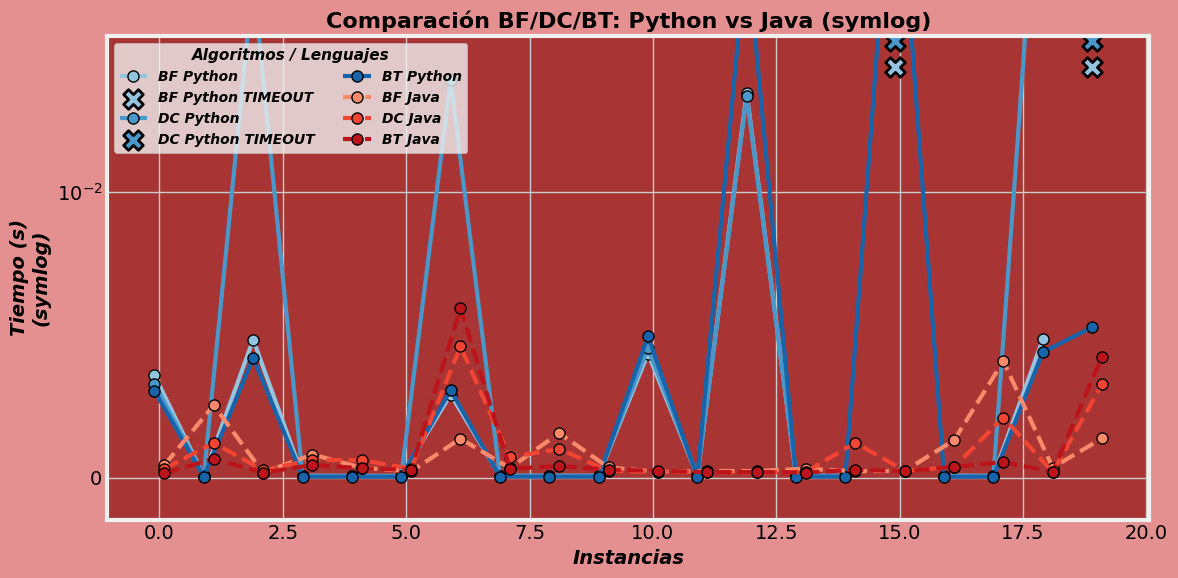

In [126]:
# 1️⃣ Forzar "TIMEOUT" → NaN
for lang, df in dfs.items():
    for col in ["tiempo BF", "tiempo DC", "tiempo BT"]:
        df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce")

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

# 2️⃣ Eje X
n = len(df_python_results)
x = np.arange(n)

# 3️⃣ Escalas de color para Python (Blues) y Java (Reds)
algs      = ["tiempo BF", "tiempo DC", "tiempo BT"]
py_colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(algs)))
ja_colors = plt.cm.Reds (np.linspace(0.4, 0.8, len(algs)))
color_map = {
    'Python': dict(zip(algs, py_colors)),
    'Java':   dict(zip(algs, ja_colors))
}

line_styles = {"Python": "-", "Java": "--"}
x_offsets   = {"Python": -0.1, "Java": 0.1}

# 4️⃣ Dibujar curvas y marcar timeouts
for lang, style in line_styles.items():
    df = dfs[lang]
    xo = x + x_offsets[lang]
    for idx, col in enumerate(algs):
        label = ["BF","DC","BT"][idx] + f" {lang}"
        c = color_map[lang][col]
        ax.plot(
            xo, df[col],
            linestyle=style, color=c,
            marker="o", markersize=8,
            markeredgecolor="black", markerfacecolor=c,
            linewidth=3, label=label
        )
        mask = df[col].isna()
        if mask.any():
            ymin, ymax = ax.get_ylim()
            y_to = ymax * 1.2
            ax.scatter(
                xo[mask], np.full(mask.sum(), y_to),
                marker="X", s=200,
                facecolor=c, edgecolor="black", linewidth=2,
                label=label + " TIMEOUT"
            )
            ax.set_ylim(top=y_to * 1.05)

# 5️⃣ Cambiar a symlog para ver bien pequeñas y grandes diferencias
#    - linthresh: valores absolutos <= 1e-3 se dibujan linealmente
ax.set_yscale('symlog', base=10, linthresh=1e-2, subs=[2,3,4,5,6,7,8,9])
ax.minorticks_on()

# 6️⃣ Etiquetas y leyenda
ax.set_xlabel("Instancias", fontsize=14, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Tiempo (s)\n(symlog)", fontsize=14, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación BF/DC/BT: Python vs Java (symlog)", fontsize=16, fontweight="bold")

legend = ax.legend(
    title="Algoritmos / Lenguajes",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=11, ncol=2, framealpha=0.8
)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()

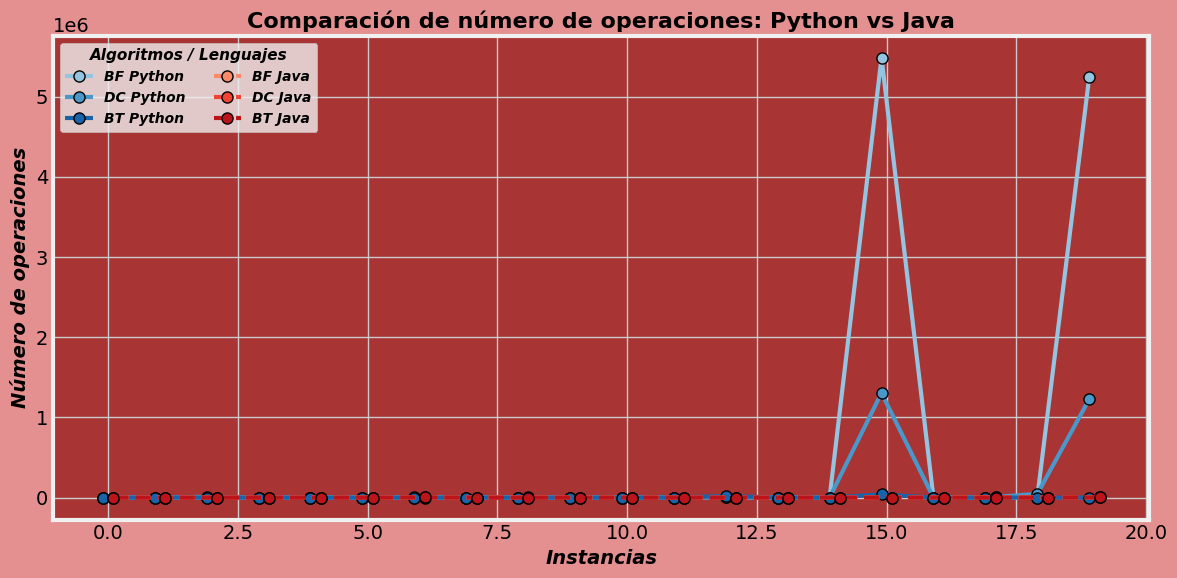

In [127]:
# 0️⃣ Copiar ambos resultados
dfs = {
    'Python': df_python_results.copy(),
    'Java':   df_java_results.copy()
}

# 1️⃣ Forzar "TIMEOUT" → NaN en las columnas de operaciones
for lang, df in dfs.items():
    for col in ["ops BF", "ops DC", "ops BT"]:
        df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce")

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

# 2️⃣ Eje X
n = len(df_python_results)
x = np.arange(n)

# 3️⃣ Escalas de color: Python (Blues), Java (Reds)
algs      = ["ops BF", "ops DC", "ops BT"]
py_colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(algs)))
ja_colors = plt.cm.Reds (np.linspace(0.4, 0.8, len(algs)))
color_map = {
    'Python': dict(zip(algs, py_colors)),
    'Java':   dict(zip(algs, ja_colors))
}

line_styles = {"Python": "-", "Java": "--"}
x_offsets   = {"Python": -0.1, "Java":  0.1}

# 4️⃣ Dibujar curvas de operaciones y marcar excepciones
for lang, style in line_styles.items():
    df = dfs[lang]
    xo = x + x_offsets[lang]
    for idx, col in enumerate(algs):
        label = col.split()[1] + f" {lang}"  # "BF Python", etc.
        c = color_map[lang][col]
        # curva con marcador del mismo color
        ax.plot(
            xo, df[col],
            linestyle=style, color=c,
            marker="o", markersize=8,
            markeredgecolor="black", markerfacecolor=c,
            linewidth=3, label=label
        )
        # si hubo TIMEOUT en operaciones (NaN), marcar con X
        mask = df[col].isna()
        if mask.any():
            ymin, ymax = ax.get_ylim()
            y_to = ymax + 0.05*(ymax - ymin)
            ax.scatter(
                xo[mask], np.full(mask.sum(), y_to),
                marker="X", s=200,
                facecolor=c, edgecolor="black", linewidth=2,
                label=label + " TIMEOUT"
            )
            ax.set_ylim(top=y_to + 0.05*(ymax - ymin))

# 5️⃣ Etiquetas, título y leyenda
ax.set_xlabel("Instancias", fontsize=14, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Número de operaciones", fontsize=14, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación de número de operaciones: Python vs Java", fontsize=16, fontweight="bold")

legend = ax.legend(
    title="Algoritmos / Lenguajes",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=11, ncol=2, framealpha=0.8
)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()


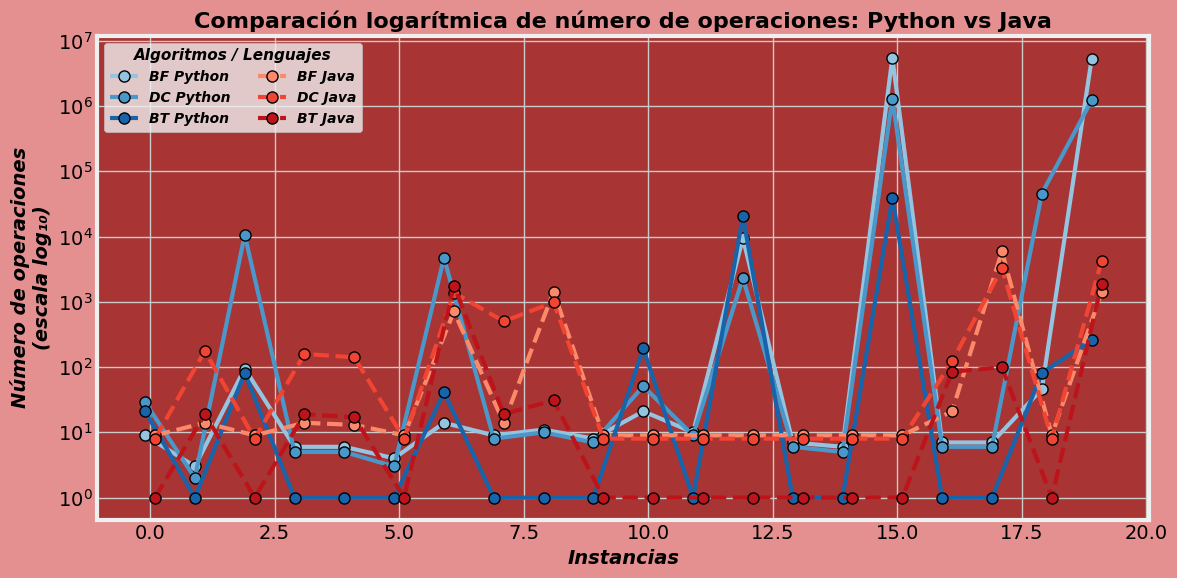

In [128]:
# 0️⃣ Copiar ambos resultados
dfs = {
    'Python': df_python_results.copy(),
    'Java':   df_java_results.copy()
}

# 1️⃣ Forzar "TIMEOUT" → NaN en las columnas de operaciones
for lang, df in dfs.items():
    for col in ["ops BF", "ops DC", "ops BT"]:
        df[col] = pd.to_numeric(df[col].replace("TIMEOUT", np.nan), errors="coerce")

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

# 2️⃣ Eje X
n = len(df_python_results)
x = np.arange(n)

# 3️⃣ Escalas de color: Python (Blues), Java (Reds)
algs      = ["ops BF", "ops DC", "ops BT"]
py_colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(algs)))
ja_colors = plt.cm.Reds (np.linspace(0.4, 0.8, len(algs)))
color_map = {
    'Python': dict(zip(algs, py_colors)),
    'Java':   dict(zip(algs, ja_colors))
}

line_styles = {"Python": "-", "Java": "--"}
x_offsets   = {"Python": -0.1, "Java": 0.1}

# 4️⃣ Dibujar curvas de operaciones y marcar excepciones
for lang, style in line_styles.items():
    df = dfs[lang]
    xo = x + x_offsets[lang]
    for idx, col in enumerate(algs):
        label = col.split()[1] + f" {lang}"  # "BF Python", etc.
        c = color_map[lang][col]
        # curva con marcador del mismo color
        ax.plot(
            xo, df[col],
            linestyle=style, color=c,
            marker="o", markersize=8,
            markeredgecolor="black", markerfacecolor=c,
            linewidth=3, label=label
        )
        # si hubo TIMEOUT en operaciones (NaN), marcar con X
        mask = df[col].isna()
        if mask.any():
            ymin, ymax = ax.get_ylim()
            # en escala log, ubicamos la X un poco por encima
            y_to = ymax * 1.2
            ax.scatter(
                xo[mask], np.full(mask.sum(), y_to),
                marker="X", s=200,
                facecolor=c, edgecolor="black", linewidth=2,
                label=label + " TIMEOUT"
            )
            ax.set_ylim(top=y_to * 1.05)

# 5️⃣ Escala logarítmica en el eje Y
ax.set_yscale('log')
ax.minorticks_on()

# 6️⃣ Etiquetas, título y leyenda
ax.set_xlabel("Instancias", fontsize=14, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Número de operaciones\n(escala log₁₀)", fontsize=14, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación logarítmica de número de operaciones: Python vs Java", fontsize=16, fontweight="bold")

legend = ax.legend(
    title="Algoritmos / Lenguajes",
    prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
    title_fontsize=11, ncol=2, framealpha=0.8
)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()